In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import seaborn as sns

In [3]:
writer_stats = pd.read_csv("writer_stats.csv")
writer_stats["First Credit"] = writer_stats["First Credit"] + 1
writer_stats["Last Credit"] = writer_stats["Last Credit"] + 1
writer_stats = writer_stats.sort_values(by = ["First Credit", "Last Credit"], ascending = False)

In [4]:
writer_stats

,Writer,First Credit,Last Credit,Total Episodes,Mean Rating
27,Steve Joe,8,8,2,6.450000
28,Greg Schaffer,8,8,2,6.450000
29,Ken Blankstein,8,8,1,6.500000
26,David Spancer,7,8,2,7.000000
24,Patrick Kienlen,6,8,1,7.400000
25,Jennifer Keene,6,8,1,7.200000
20,Sarah McLaughlin,4,8,73,7.241096
21,Alan Dybner,4,8,74,7.252703
22,Jill Effron,4,8,1,7.700000
23,Gregg Mettler,4,8,15,7.486667


In [61]:
# assign score range to number from (0,1) for use in color map
scaler = MinMaxScaler()
norm_scores = scaler.fit(writer_stats["Mean Rating"].values.reshape(-1,1)).transform(writer_stats["Mean Rating"].values.reshape(-1,1))
norm_scores

array([[0.        ],
       [0.        ],
       [0.03092784],
       [0.34020619],
       [0.58762887],
       [0.46391753],
       [0.48933766],
       [0.49651714],
       [0.77319588],
       [0.64123711],
       [0.75773196],
       [0.76052664],
       [0.77938144],
       [0.73412914],
       [0.67878459],
       [0.75994109],
       [0.74226804],
       [0.84723524],
       [0.83505155],
       [0.82016037],
       [0.83130272],
       [0.86941581],
       [0.86941581],
       [0.91237113],
       [0.92439863],
       [0.92439863],
       [0.85979381],
       [0.91237113],
       [1.        ],
       [0.98969072]])

In [81]:
cmap = cm.get_cmap('magma', len(norm_scores))
print(cmap)

0
0
0
1
2
2
4
4
4
4
5
5
2
6
6
6
1
7
7
7
7
6
6
3
2
2
1
1
0
0


<ipython-input-89-739af46bbe54>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(writer_stats["Writer"])


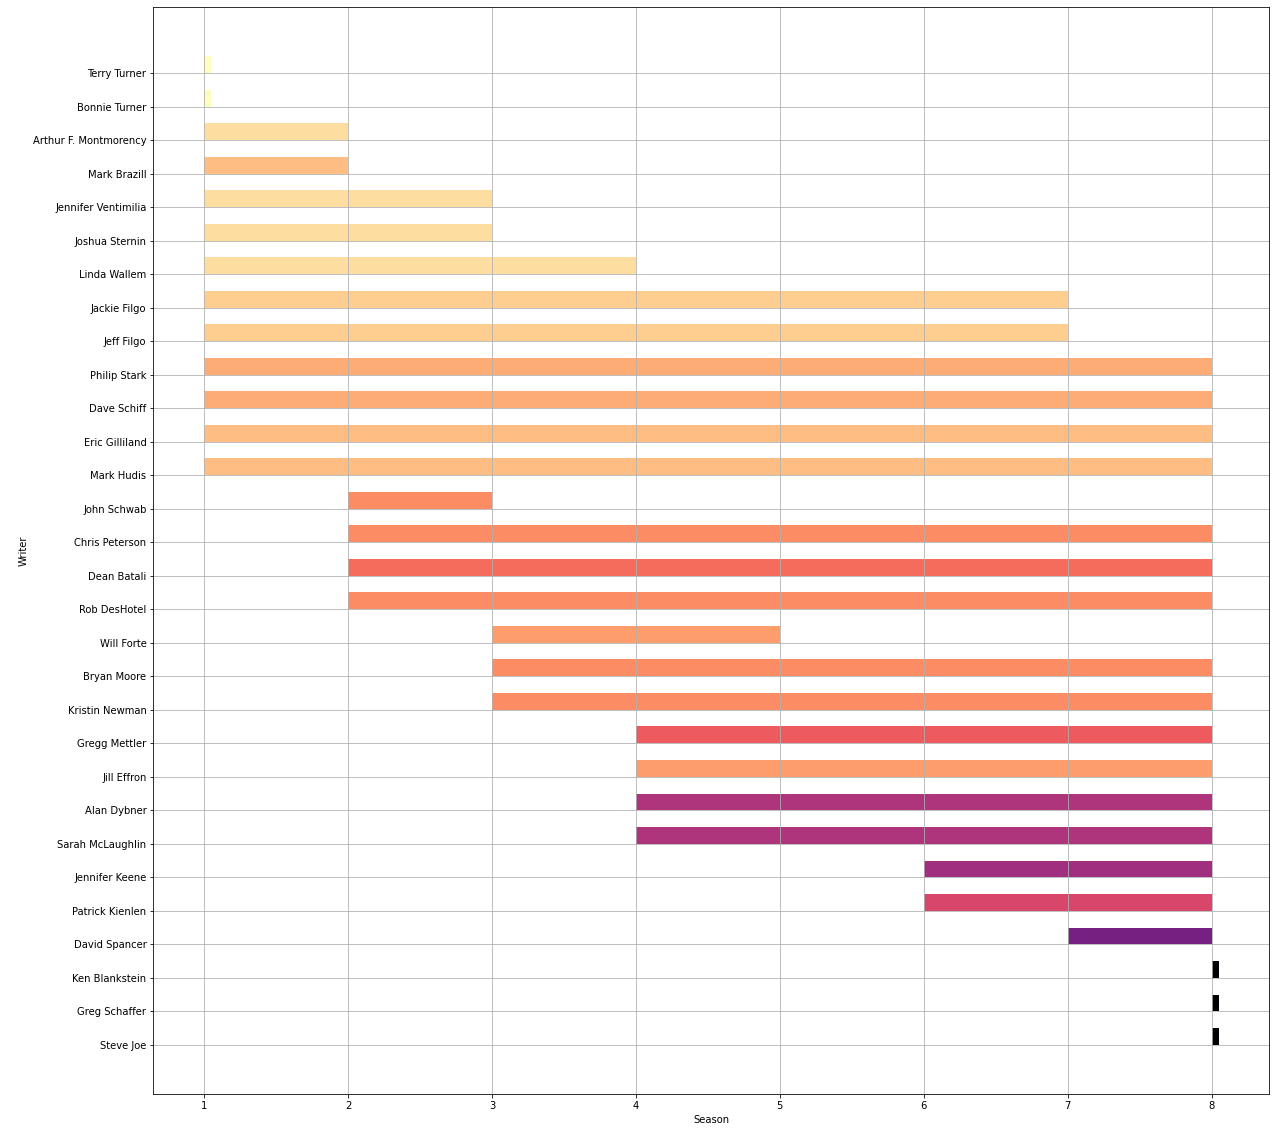

In [89]:
fig, ax = plt.subplots(figsize = (20,20))

for writer in range(writer_stats.shape[0]):
    #print(writer_stats.iloc[writer, :])
    start = writer_stats.iloc[writer, 1]
    end = writer_stats.iloc[writer, 2]
    print(end - start)
    if end - start == 0:
        ax.broken_barh([(start, (end - start + .05))], (writer,.5), facecolors = cmap(norm_scores[writer]))
    else:
        ax.broken_barh([(start, (end - start))], (writer,.5), facecolors = cmap(norm_scores[writer]))
        
    
ax.set_yticklabels(writer_stats["Writer"])
ax.set_yticks(list(range(writer_stats.shape[0])))
ax.set_ylabel('\nWriter')
ax.set_xlabel('Season\n')
ax.grid(True)

<AxesSubplot:xlabel='Total Episodes', ylabel='Mean Rating'>

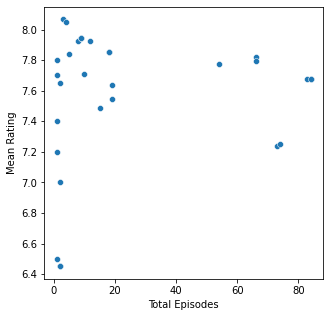

In [12]:
fig, ax = plt.subplots(figsize = (5,5))
sns.scatterplot(data=writer_stats, x="Total Episodes", y="Mean Rating")